In [1]:
# pearson correlation coefficient
# y = m*x+b --> since m=slope, b=y-intercept, x-y variables
# slope(m)= r * sy/sx
# r = sum(x-x dash)(y-y dash)/ sqrt(sum(pow(x-x dash)(y-y dash))
# sx = pow(x-x dash)/m-1       sy= pow(y-y dash)/m-1   while m=no.cols - 1
# b = y dash - m * x dash

In [24]:
import pandas as pd # deal with data (read-edit)
import numpy as np # mathematics - linear algebra
import seaborn as sb # visualization ll data
import matplotlib.pyplot as plt # drawing and visualization
from sklearn.model_selection import train_test_split # divide data
from sklearn.linear_model import LinearRegression # training the model
from sklearn.metrics import r2_score,mean_squared_error # error calculations
import os
os.chdir(r"C:\Users\N..C..C\Downloads\Documents")

In [20]:
data = pd.read_csv("Salary_Data.csv")
data.tail() # a5r 5 rows
data.head() # awl 5 rows
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000

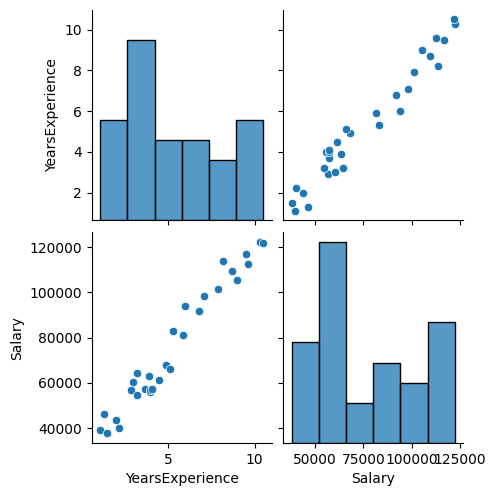

In [22]:
sb.pairplot(data) # positive correlation 

In [41]:
x = data.iloc[:,:-1]
y = data.iloc[:,1]
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.8,random_state=10) # 0.8 3shan a5od 80% mn el data a3mlha train
model = LinearRegression()
model.fit(x_train,y_train) # training 
model.score(x_train,y_train) # relation between i/o
model.score(x_test,y_test)

0.9816423482070253

In [42]:
print(x_test)

    YearsExperience
20              6.8
7               3.2
5               2.9
2               1.5
3               2.0
21              7.1


In [43]:
print(y_test)

20    91738.0
7     54445.0
5     56642.0
2     37731.0
3     43525.0
21    98273.0
Name: Salary, dtype: float64


In [37]:
print(x_train)

    YearsExperience
13              4.1
27              9.6
12              4.0
1               1.3
19              6.0
14              4.5
18              5.9
6               3.0
11              4.0
23              8.2
24              8.7
28             10.3
22              7.9
10              3.9
26              9.5
29             10.5
8               3.2
25              9.0
16              5.1
17              5.3
0               1.1
15              4.9
4               2.2
9               3.7


In [38]:
print(y_train)

13     57081.0
27    112635.0
12     56957.0
1      46205.0
19     93940.0
14     61111.0
18     81363.0
6      60150.0
11     55794.0
23    113812.0
24    109431.0
28    122391.0
22    101302.0
10     63218.0
26    116969.0
29    121872.0
8      64445.0
25    105582.0
16     66029.0
17     83088.0
0      39343.0
15     67938.0
4      39891.0
9      57189.0
Name: Salary, dtype: float64


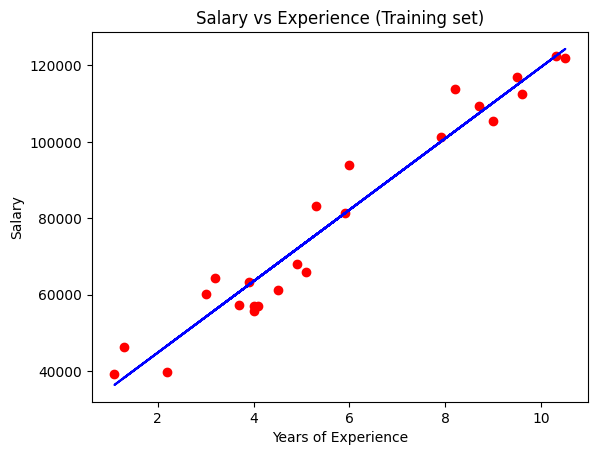

In [46]:
plt.scatter(x_train, y_train, color="red")
plt.plot(x_train, model.predict(x_train), color ="blue")
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

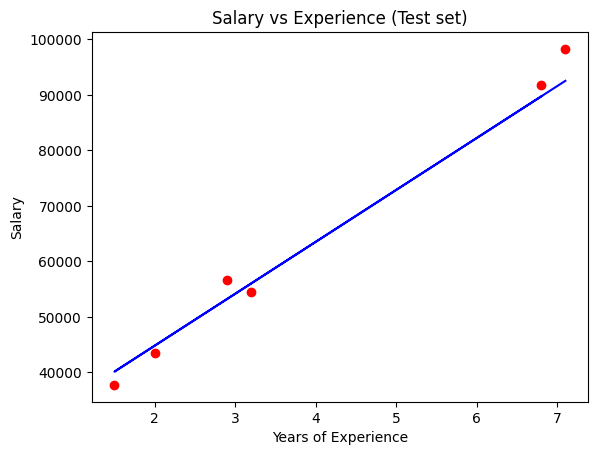

In [48]:
y_pred = model.predict(x_test)
plt.scatter(x_test, y_test, color = "red")
plt.plot(x_test, y_pred, color = "blue")
plt.title("Salary vs Experience (Test set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

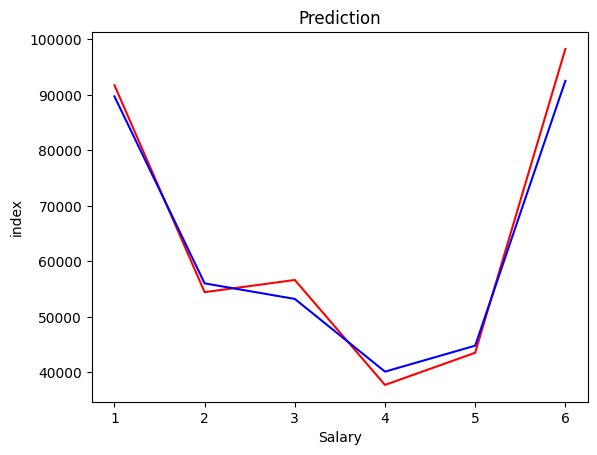

In [51]:
# errors visualization
c = [i for i in range(1,len(y_test)+1)]
plt.plot(c, y_test, color="red", linestyle="-")
plt.plot(c, y_pred, color="blue", linestyle="-")
plt.title("Prediction")
plt.xlabel("Salary")
plt.ylabel("index")
plt.show()

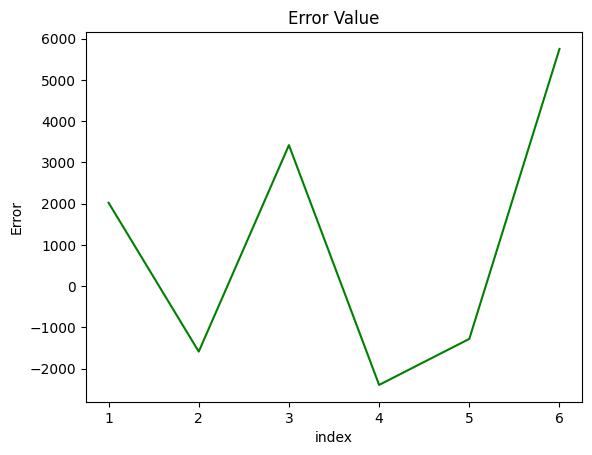

In [54]:
c = [i for i in range(1,len(y_test)+1)]
plt.plot(c, y_test-y_pred, color="green", linestyle="-")
plt.title("Error Value")
plt.xlabel("index")
plt.ylabel("Error")
plt.show()

In [57]:
mse = mean_squared_error(y_test, y_pred)
r = r2_score(y_test, y_pred)
print("mean squared error = ",mse)
print("r square = ",r)

mean squared error =  9785570.138914317
r square =  0.9816423482070253


In [62]:
print("Intercept (b) = ", model.intercept_)
print("Coefficient of line = ", model.coef_)
y_hat = model.coef_ * 4.5 + model.intercept_
print(y_hat)

Intercept (b) =  26089.096632416724
Coefficient of line =  [9356.86299354]
[68194.98010334]
